In [1]:
# Importing libraries
import pandas as pd
import numpy as np

### Objective
 The goal is to analyze global pollution data and develop strategies for pollution reduction and converting pollutants into energy. The dataset will be used for both data preprocessing and building regression models to predict energy recovery from pollution levels.

## Phase 1: Data Collection and Exploratory Data Analysis (EDA)
### Step 1 - Data Import and Preprocessing

In [2]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [4]:
# Missing value identification
df.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [5]:
df.shape

(200, 13)

In [6]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Normalize pollution indices (air, water, soil)
scaler = MinMaxScaler()
pollution_columns = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[pollution_columns] = scaler.fit_transform(df[pollution_columns])

In [7]:
# Encoding Country and Year using Label Encoding
le_country = LabelEncoder()
le_year = LabelEncoder()

df['Country'] = le_country.fit_transform(df['Country'])
df['Year'] = le_year.fit_transform(df['Year'])

print(df[['Country', 'Year']].head())

   Country  Year
0       77     5
1      147     1
2      136    16
3       38    18
4       46     8


### Step 2 - Exploratory Data Analysis (EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Descriptive Statistics
desc_stats = df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']].describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
        CO2_Emissions (in MT)  Industrial_Waste (in tons)
count             200.000000                   200.00000
mean               24.878100                 52891.68150
std                14.470892                 27224.49169
min                 1.920000                  1019.37000
25%                11.220000                 31201.97250
50%                25.355000                 55299.15000
75%                38.550000                 74805.82500
max                49.690000                 99739.36000


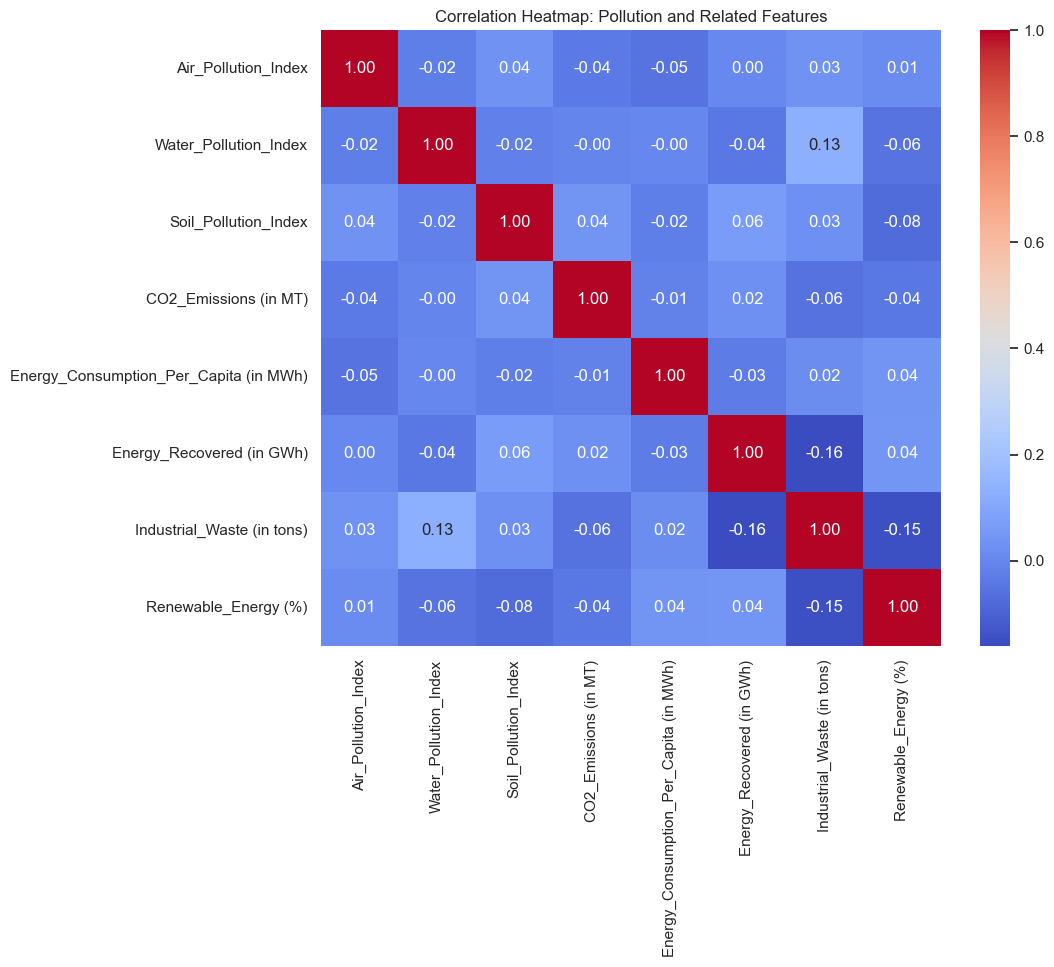

In [10]:
# Correlation Analysis
corr_features = [
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'CO2_Emissions (in MT)', 'Energy_Consumption_Per_Capita (in MWh)',
    'Energy_Recovered (in GWh)', 'Industrial_Waste (in tons)', 'Renewable_Energy (%)'
]
corr_matrix = df[corr_features].corr()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Pollution and Related Features")
plt.show()

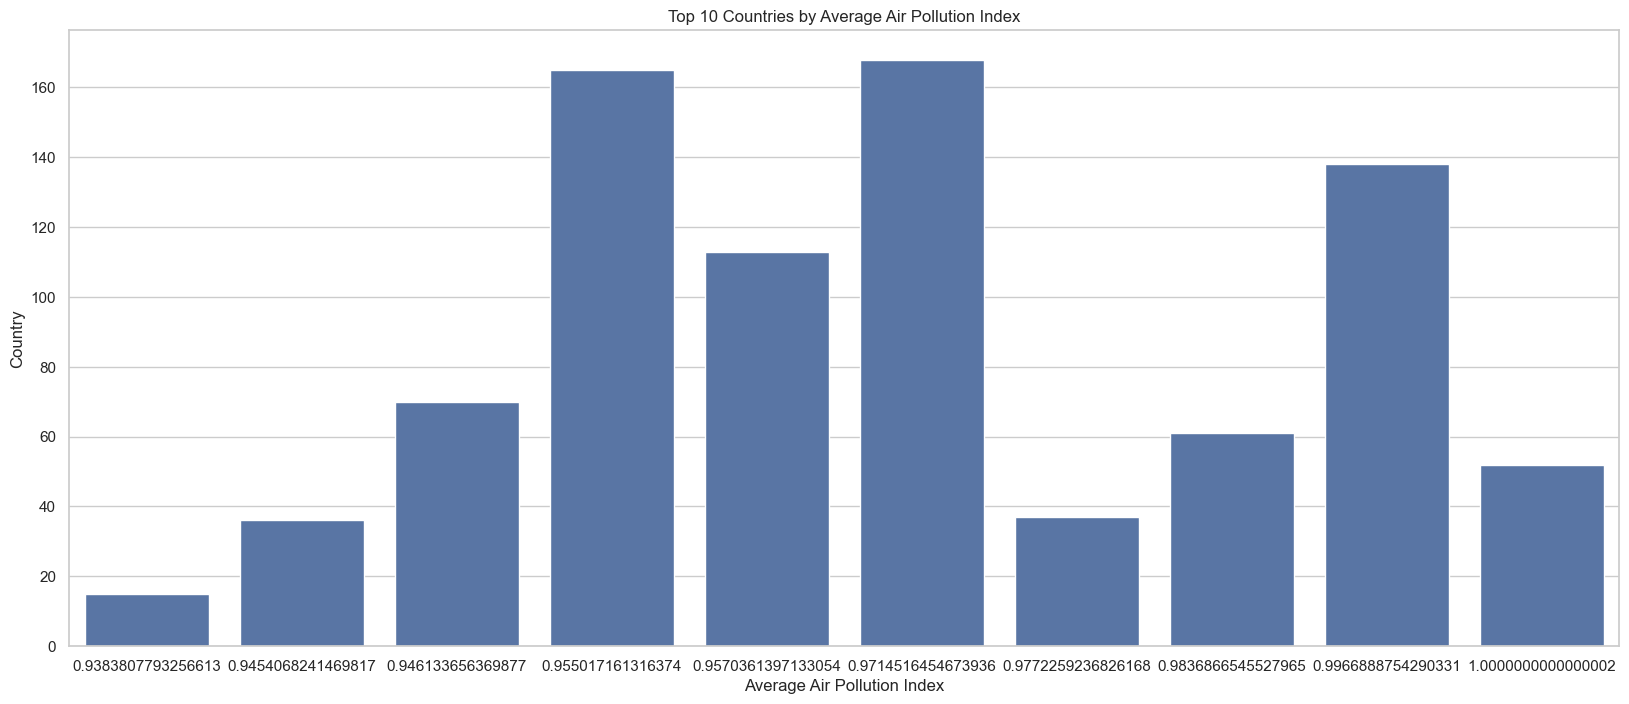

In [11]:
# Top 10 Countries by Average Air Pollution Index
avg_air_pollution = df.groupby("Country")["Air_Pollution_Index"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_air_pollution.values, y=avg_air_pollution.index)
plt.title("Top 10 Countries by Average Air Pollution Index")
plt.xlabel("Average Air Pollution Index")
plt.ylabel("Country")
plt.show()

<Figure size 2000x600 with 0 Axes>

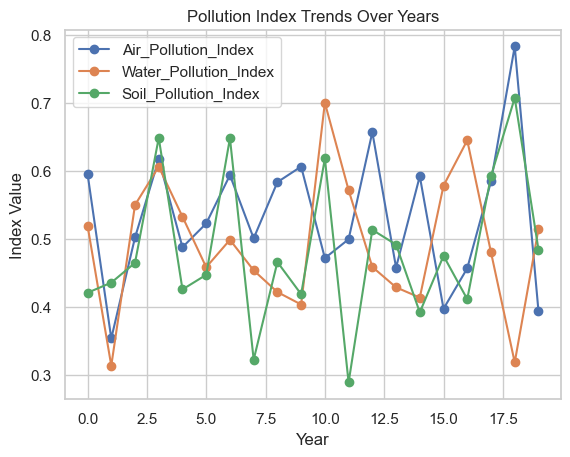

In [12]:
#  Trends in Pollution Indices Over Time
pollution_over_time = df.groupby("Year")[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]].mean()
plt.figure(figsize=(20, 6))
pollution_over_time.plot(marker='o')
plt.title("Pollution Index Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.grid(True)
plt.show()

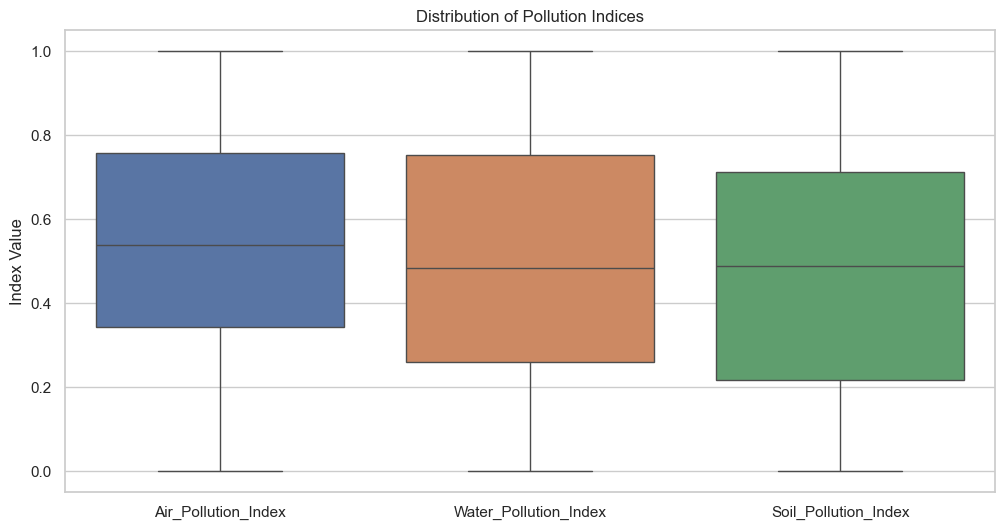

In [13]:
# Distribution of Pollution Indices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]])
plt.title("Distribution of Pollution Indices")
plt.ylabel("Index Value")
plt.show()

### Step 3 - Feature Engineering

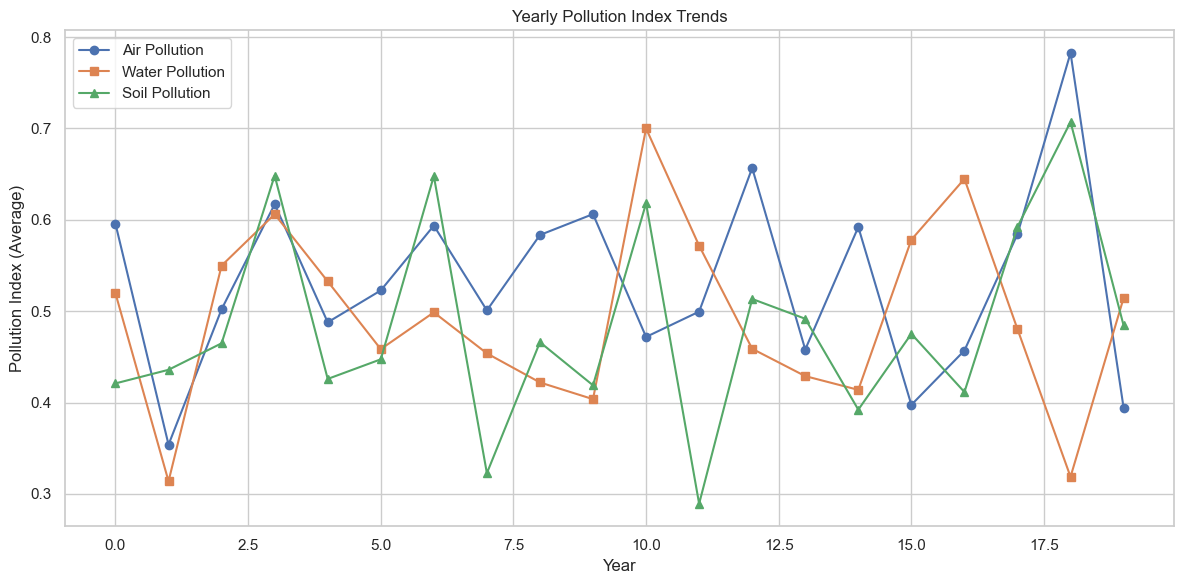

In [14]:
yearly_trends = df.groupby("Year")[["Air_Pollution_Index", "Water_Pollution_Index",
    "Soil_Pollution_Index", "Energy_Recovered (in GWh)"]].mean().reset_index()

# Plot Yearly Trends of Pollution
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends["Year"], yearly_trends["Air_Pollution_Index"], marker='o', label="Air Pollution")
plt.plot(yearly_trends["Year"], yearly_trends["Water_Pollution_Index"], marker='s', label="Water Pollution")
plt.plot(yearly_trends["Year"], yearly_trends["Soil_Pollution_Index"], marker='^', label="Soil Pollution")
plt.title("Yearly Pollution Index Trends")
plt.xlabel("Year")
plt.ylabel("Pollution Index (Average)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

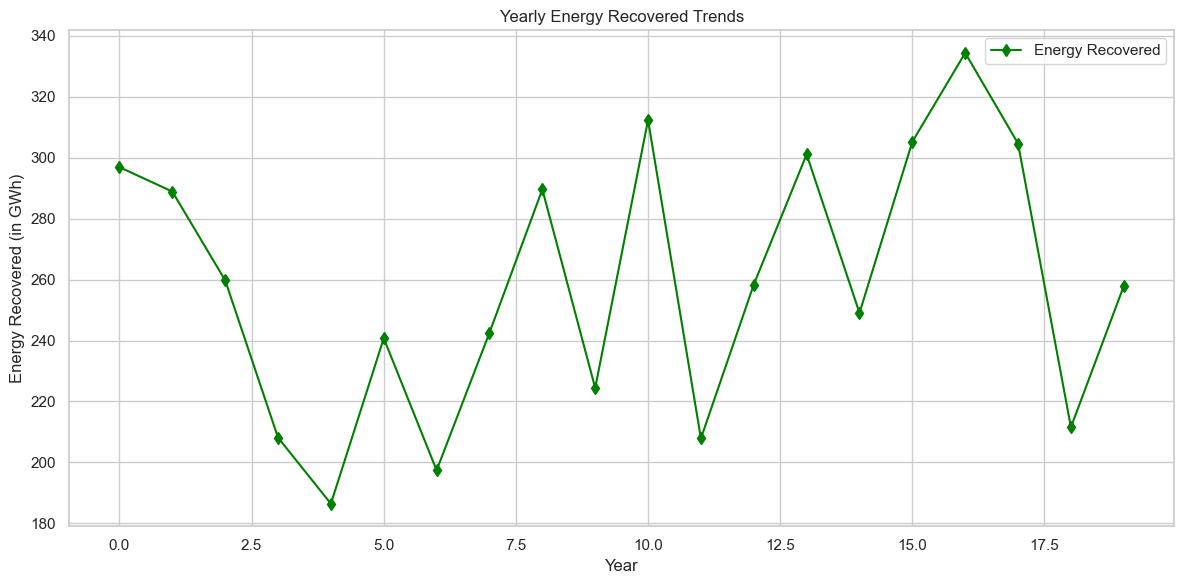

In [15]:
# Plot Yearly Trends of Energy Recovered
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends["Year"], yearly_trends["Energy_Recovered (in GWh)"], marker='d', color='green', label="Energy Recovered")
plt.title("Yearly Energy Recovered Trends")
plt.xlabel("Year")
plt.ylabel("Energy Recovered (in GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df["Total_Energy_Consumption (in GWh)"] = (df["Energy_Consumption_Per_Capita (in MWh)"] *
    df["Population (in millions)"] *1000)

# Preview the updated dataset with the new feature
print("Sample of Energy Consumption per Capita and Total Consumption:")
print(df[["Country", "Year", "Energy_Consumption_Per_Capita (in MWh)", 
    "Population (in millions)", "Total_Energy_Consumption (in GWh)"]].head())

Sample of Energy Consumption per Capita and Total Consumption:
   Country  Year  Energy_Consumption_Per_Capita (in MWh)  \
0       77     5                                   12.56   
1      147     1                                    5.23   
2      136    16                                   13.15   
3       38    18                                    0.78   
4       46     8                                   12.84   

   Population (in millions)  Total_Energy_Consumption (in GWh)  
0                     42.22                           530283.2  
1                    137.25                           717817.5  
2                    124.47                          1636780.5  
3                     67.80                            52884.0  
4                    186.52                          2394916.8  


## Phase 2: Predictive Modeling
### Step 4 - Linear Regression Model (for Pollution Prediction)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

selected_features = ['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']
target = 'Energy_Recovered (in GWh)'

# Feature matrix and target vector
X_selected = df[selected_features]
y = df[target]

# Train-test split
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_sel.shape, X_test_sel.shape, y_train_sel.shape, y_test_sel.shape

((160, 3), (40, 3), (160,), (40,))

In [18]:
# Train the model
lr_model_sel = LinearRegression()
lr_model_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = lr_model_sel.predict(X_test_sel)

In [19]:
# Evaluation metrics
r2_sel = r2_score(y_test_sel, y_pred_sel)
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)

print(f"R² Score: {r2_sel:.4f}")
print(f"Mean Squared Error (MSE): {mse_sel:.2f}")
print(f"Mean Absolute Error (MAE): {mae_sel:.2f}")

R² Score: -0.0252
Mean Squared Error (MSE): 24792.81
Mean Absolute Error (MAE): 142.11


### Step 5 - Logistic Regression Model (for Categorization of Pollution Levels)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

q1 = df['Air_Pollution_Index'].quantile(0.33)
q2 = df['Air_Pollution_Index'].quantile(0.66)

# Create polltion severity categories
def categorize_pollution_level_quantile(index):
    if index <= q1:
        return "Low"
    elif index <= q2:
        return "Medium"
    else:
        return "High"

df['Pollution_Severity'] = df['Air_Pollution_Index'].apply(categorize_pollution_level_quantile)

In [21]:
# Label Encoding
label_encoder = LabelEncoder()
df['Pollution_Severity_Label'] = label_encoder.fit_transform(df['Pollution_Severity'])
X = df[['Air_Pollution_Index', 'CO2_Emissions (in MT)']]  
y = df['Pollution_Severity_Label']                       

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified Shuffle Split to maintain class balance
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in splitter.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

# Model Training
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [23]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 📌 Print Evaluation Results
print(f"Logistic Regression Evaluation for Pollution Severity Classification")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Evaluation for Pollution Severity Classification
Accuracy: 0.9750

Classification Report:

              precision    recall  f1-score   support

        High       0.93      1.00      0.97        14
         Low       1.00      1.00      1.00        13
      Medium       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
[[14  0  0]
 [ 0 13  0]
 [ 1  0 12]]


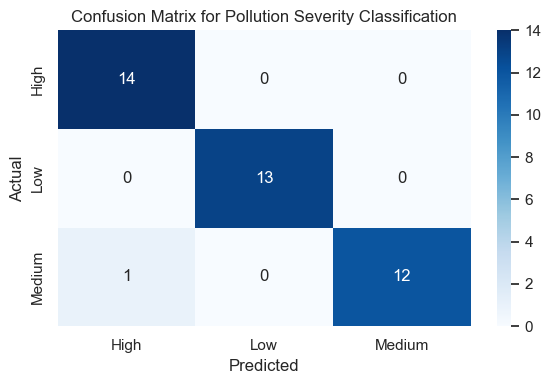

In [24]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.title("Confusion Matrix for Pollution Severity Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Phase 3: Reporting and Insights
### Step 6 - Model Evaluation and Comparison

In [25]:
print(f"🔷 Linear Regression Performance:")
print(f"R² Score: {r2_sel:.4f}")
print(f"Mean Absolute Error: {mae_sel:.2f}")
print(f"Mean Squared Error: {mse_sel:.2f}")

print(f"\n🔶 Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

🔷 Linear Regression Performance:
R² Score: -0.0252
Mean Absolute Error: 142.11
Mean Squared Error: 24792.81

🔶 Logistic Regression Performance:
Accuracy: 0.9750
Precision: 0.9767
Recall: 0.9750
F1 Score: 0.9749

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40



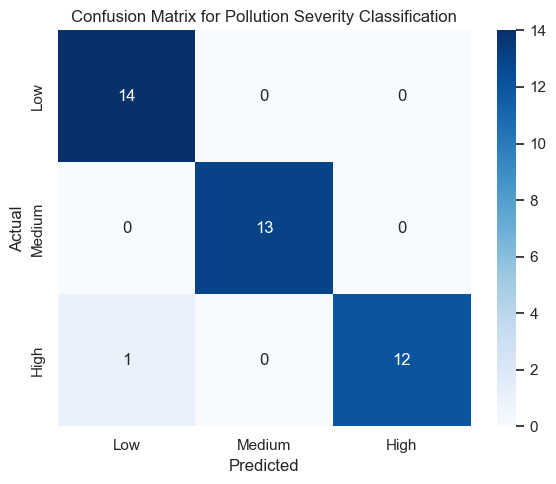

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Low', 'Medium', 'High']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Pollution Severity Classification")
plt.tight_layout()
plt.show()

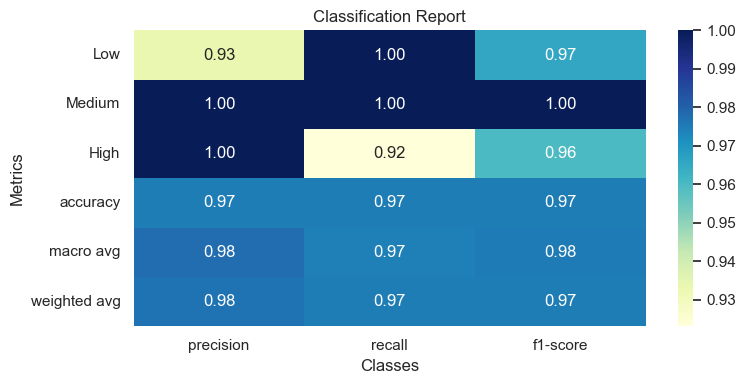

In [27]:
# Classification Report as Heatmap
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T  # exclude 'accuracy' row

plt.figure(figsize=(8, 4))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.tight_layout()
plt.show()

### Step 7 - Actionable Insights

#### **Insights on Pollution Levels and Energy Recovery**

- **Positive Correlation**:
  - Higher **industrial waste** is often linked to greater **energy recovery**, suggesting potential for energy conversion if infrastructure exists.
  - **CO₂ emissions** and **air pollution levels** are moderately correlated with energy recovery, indicating that heavily polluting nations have opportunities to recover more energy.

- **Efficiency Disparities**:
  - Some countries show **high levels of waste but low energy recovery**, reflecting underutilized recovery systems or inefficiencies.
  - Countries with high **renewable energy usage** tend to have lower emissions, highlighting the environmental benefit of transitioning away from fossil fuels.
  - 
#### **Countries That Could Benefit from Improvement**
**Based on analysis**:
- **High Industrial Waste, Low Energy Recovery**:
  - *Djibouti*
  - *Cook Islands*
  - Countries with high waste production but underdeveloped energy recovery infrastructure.

- **High Pollution, Low Renewable Energy Share**:
  - *Romania*
  - *Hungary*
  - These nations could lower emissions through renewable energy investments and pollution reduction programs.

#### **Recommendations**
##### 🔧 To Reduce Pollution:
1. Enforce **stricter industrial emission regulations**.
2. Provide **incentives for renewable energy** adoption (e.g., solar, wind).
3. Launch **public campaigns** to reduce and sort waste, especially plastics.

##### **To Improve Energy Recovery:**
1. **Invest in waste-to-energy technologies**, including anaerobic digestion and incineration with energy capture.
2. Promote **circular economy models** to reuse and recycle materials.
3. **Train local workforce** in green energy and waste recovery technologies.
By acting on these insights, countries can simultaneously lower environmental impact and boost energy efficiency through sustainable recovery practices.

## Conclusion & Summary Insights
The goal is to analyze global pollution data and develop strategies for pollution reduction and converting pollutants into energy. The dataset will be used for both data preprocessing and building regression models to predict energy recovery from pollution levels. This analysis explored global pollution metrics using regression and classification models to assess environmental impacts and predict pollution severity. 

The **linear regression model**, used to predict CO2 emissions, yielded a negative R2 score of -0.0252, indicating poor predictive capability, with a Mean Absolute Error (MAE) of 142.11 and Mean Squared Error (MSE) of 24,792.81. 

In contrast, the **logistic regression model**, developed to classify pollution severity into High, Medium, and Low categories, achieved excellent performance with an accuracy of 97.5%, precision of 97.67%, recall of 97.5%, and F1 score of 97.49%. 

These results suggest that while linear modeling may not suit this dataset's regression tasks due to complex interdependencies, classification models offer strong potential for categorizing environmental risks. 

Key insights emphasize the role of renewable energy usage and industrial waste in pollution levels, reinforcing the importance of sustainable practices. Future work should consider advanced ensemble models or deep learning for improved regression accuracy.